# Data Wrangling and EDA

In [416]:
# libraries
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem.isri import ISRIStemmer

In [417]:
df = pd.read_excel("/Users/muneraalrajhi/Desktop/datasets/data/Poems.xlsx")

In [418]:
df.head()

,Poem,Number of Versus,Poet,Century,Label,Type,Metre
0,أصابت سهام الحتف يا حسرة الدهرصريح قريش والخلا...,46.0,أبو المحاسن الكربلائي,العراق,قصائد عتاب,عموديه,بحر الطويل
1,جئت يا دهر بالرزية بكراغادرت مهجة الهدى وهي حر...,37.0,أبو المحاسن الكربلائي,العراق,قصائد عتاب,عموديه,بحر الخفيف
2,وشادن أورثني حبهكالائتلافيين حزنا طويلعز علي ا...,14.0,أبو المحاسن الكربلائي,العراق,قصائد عتاب,عموديه,بحر السريع
3,قد كانت الآمال معقودةفيك وللأمال تضليلواليوم ل...,11.0,أبو المحاسن الكربلائي,العراق,قصائد عتاب,عموديه,بحر السريع
4,سواي على الضيم يبقى رهيناوغيري يرى ضارعا مستكي...,87.0,أبو المحاسن الكربلائي,العراق,قصائد عتاب,عموديه,بحر المتقارب


In [419]:
df.shape

(11191, 7)

In [420]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11191 entries, 0 to 11190
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Poem              11189 non-null  object 
 1   Number of Versus  10997 non-null  float64
 2   Poet              11191 non-null  object 
 3   Century           11190 non-null  object 
 4   Label             11191 non-null  object 
 5   Type              11191 non-null  object 
 6   Metre             11191 non-null  object 
dtypes: float64(1), object(6)
memory usage: 612.1+ KB


#### handle missing values and duplicates:

In [421]:
df.isnull().sum()

Poem                  2
Number of Versus    194
Poet                  0
Century               1
Label                 0
Type                  0
Metre                 0
dtype: int64

<AxesSubplot:>

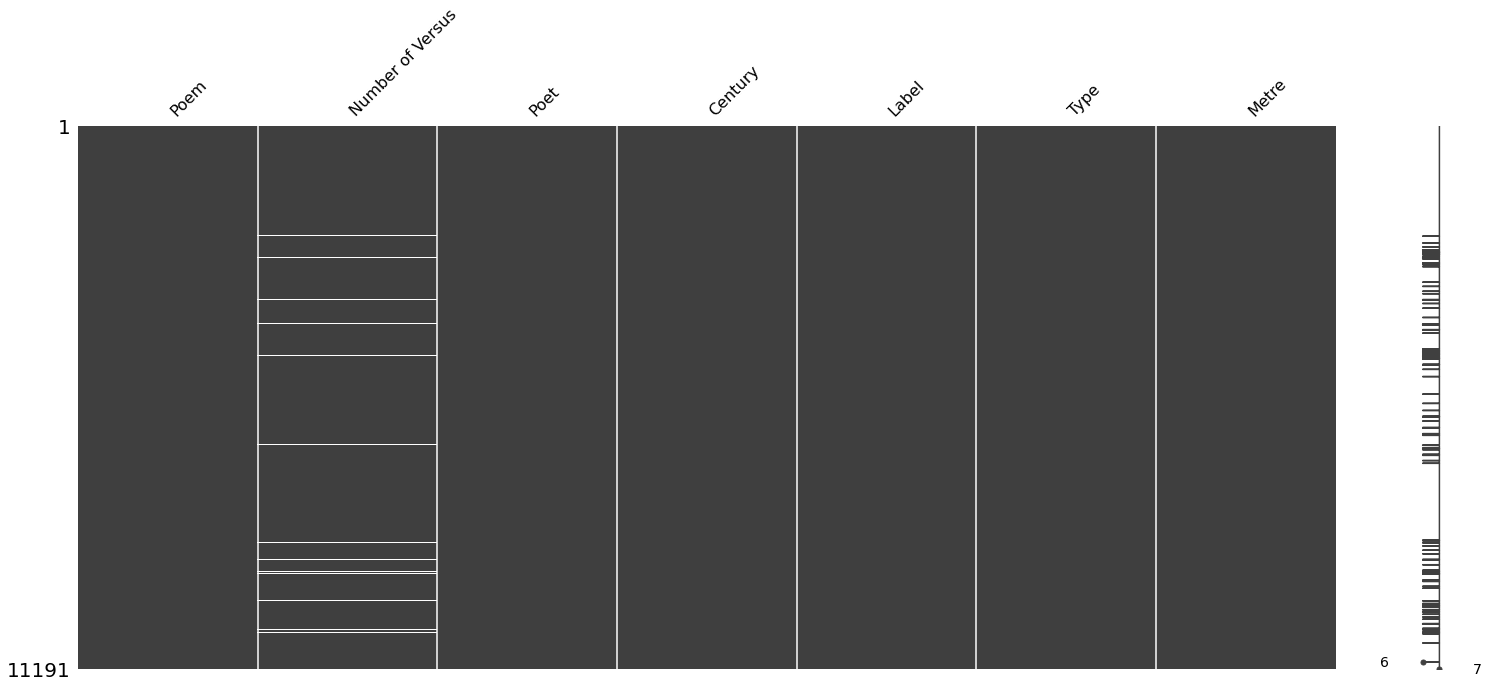

In [422]:
#plot missing values
msno.matrix(df)

In [423]:
#drop missing values
df = df.dropna()

In [424]:
# check for duplicates
df.duplicated().sum()

4

In [425]:
# drop duplicates 
df = df.drop_duplicates()

In [426]:
df.nunique()

Poem                10966
Number of Versus      152
Poet                  425
Century                23
Label                   8
Type                    1
Metre                  65
dtype: int64

In [427]:
df["Label"].value_counts()

قصائد رثاء       2451
قصائد مدح        1454
قصائد حزينه      1363
قصائد عتاب       1359
قصائد شوق        1295
قصائد رومنسيه    1111
قصائد هجاء       1047
قصائد فراق        910
Name: Label, dtype: int64

## Data Cleaning

In [428]:
# Convert Number of Versus type to object and remove the decimal
df['Number of Versus'] = df['Number of Versus'].astype(str).replace('\.0', '', regex=True)

# Remove \n from the content 
df['Poem'] = df['Poem'].replace("\xa0"," ", regex=True)
df['Poem'] = df['Poem'].replace('\n',' ', regex=True)
df['Poem'] = df['Poem'].replace("\t"," ", regex=True)
df['Poem'] = df['Poem'].replace("ًٌٍَُِّْ"," ", regex=True)

# Replac non relative Metre to NaN
df.loc[df['Metre'].str.contains('قافية',na=False), 'Metre'] = np.nan

# Rename the labels 
df["Label"] = df["Label"].replace(['قصائد رثاء'],'رثاء')
df["Label"] = df["Label"].replace(['قصائد مدح'],'مدح')
df["Label"] = df["Label"].replace(['قصائد حزينه'],'حزن')
df["Label"] = df["Label"].replace(['قصائد عتاب'],'عتاب')
df["Label"] = df["Label"].replace(['قصائد شوق'],'شوق')
df["Label"] = df["Label"].replace(['قصائد رومنسيه'],'رومنسيه')
df["Label"] = df["Label"].replace(['قصائد هجاء'],'هجاء')
df["Label"] = df["Label"].replace(['قصائد فراق'],'فراق')



In [429]:
df.sample(10)

,Poem,Number of Versus,Poet,Century,Label,Type,Metre
3122,أي خير يرجو بنو الدهر في الده ر ومازال قاتلا ل...,2,ابن وهيب الحميري,العصر العباسي,هجاء,عموديه,بحر الخفيف
1754,لجت عتيبة في هجري فقلت لها تبارك الله ما أجفاك...,3,ابو العتاهية,العصر العباسي,فراق,عموديه,بحر البسيط
4614,رفاهية الشهم اقتحام العظائم طلابا لعز أو غلابا...,81,عبد المنعم الجلياني,العصر الايوبي,مدح,عموديه,بحر الطويل
2736,ألم تر دوسرا منعت أخاها وقد حشدت لتقتله تميم ر...,3,أعشى همدان,العصر الاموي,هجاء,عموديه,بحر الوافر
5672,فإن يكن عق فيك فال فالله يجزيه بالعقوق قضى لك ...,14,علي الحصري القيرواني,العصر المملوكي,رثاء,عموديه,بحر مخلع البسيط
4171,أفديك يا أيها المسكي في مهج طيبتني بشذاك الفائ...,2,المفتي عبداللطيف فتح الله,لبنان,مدح,عموديه,بحر البسيط
10406,سقيا لجيرون وللبريص إذ عيشنا صاف من التنغيص نف...,35,الصنوبري,العصر العباسي,شوق,عموديه,بحر الرجز
8276,إن أبطأ في زيارتي أو راثا أو أشكل أمر وده والت...,2,نظام الدين الأصفهاني,العصر المملوكي,رومنسيه,عموديه,بحر الدوبيت
1547,يا من أضاع رسالة أهديتها ترك الرسالة مثل ترك ا...,9,عائشة التيمورية,مصر,فراق,عموديه,بحر الكامل
10626,نفرها عن وردها بحاجر شوق يعوق الماء في الحناجر...,68,مهيار الديلمي,العصر العباسي,شوق,عموديه,بحر الرجز


### Data visualization

In [430]:
poemsperlabel = df.groupby('Label').size()
poemsperlabel

Label
حزن        1363
رثاء       2451
رومنسيه    1111
شوق        1295
عتاب       1359
فراق        910
مدح        1454
هجاء       1047
dtype: int64

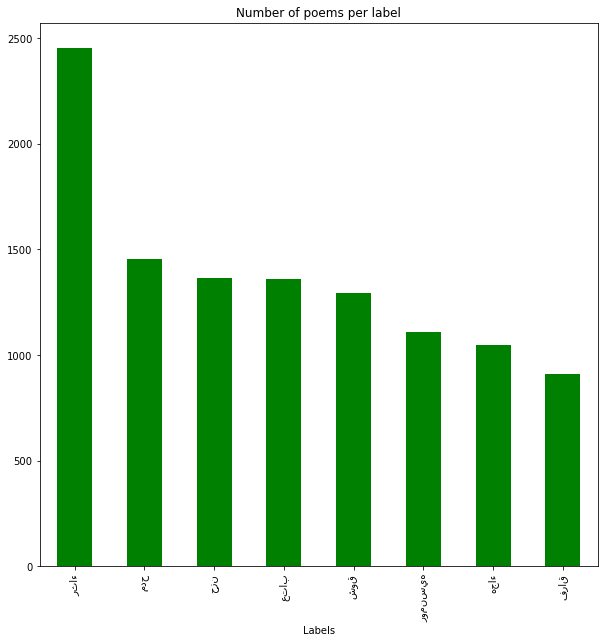

In [431]:
# Number of poems per label
poemsperlabel.sort_values(ascending=False).plot(kind='bar',figsize=(10,10), color='g')
plt.title(('Number of poems per label'))
plt.xlabel("Labels");

In [432]:
poemsperpoet = df.groupby('Metre').size()
poemsperpoet

Metre
بحر أحذ الكامل          93
بحر البسيط            1542
بحر الخفيف             846
بحر الدوبيت            393
بحر الرجز              257
بحر الرمل              226
بحر السريع             473
بحر السلسلة              3
بحر الطويل            2690
بحر القوما               1
بحر الكامل            1533
بحر المتدارك            15
بحر المتقارب           427
بحر المجتث             132
بحر المديد              66
بحر المضارع              1
بحر المقتضب              2
بحر المنسرح            213
بحر المواليا            13
بحر الهزج               42
بحر الوافر             879
بحر مجزوء البسيط        12
بحر مجزوء الخفيف        51
بحر مجزوء الدوبيت        1
بحر مجزوء الرجز         88
بحر مجزوء الرمل        159
بحر مجزوء السريع         1
بحر مجزوء الطويل         1
بحر مجزوء الكامل       275
بحر مجزوء المتقارب       8
بحر مجزوء المجتث         2
بحر مجزوء المديد         1
بحر مجزوء الوافر        57
بحر مجزوء موشح           2
بحر مخلع البسيط        150
بحر مخلع الكامل          1
بحر مشطور الرجز       

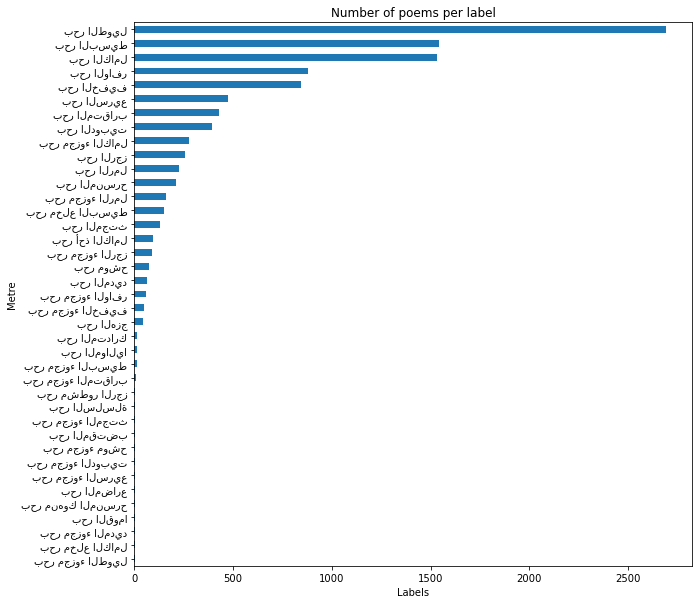

In [433]:
# Number of poems per label
poemsperpoet.sort_values().plot(kind='barh',figsize=(10,10))
plt.title(('Number of poems per label'))
plt.xlabel("Labels");

In [434]:
poemsperCentury = df.groupby('Century').size()
poemsperCentury

Century
الأردن               6
الجزائر              7
السعودية             5
العراق             411
العصر الأندلسي     671
العصر الاسلامي       8
العصر الاموي       772
العصر الايوبي      602
العصر الجاهلي       77
العصر العباسي     3029
العصر العثماني     833
العصر المملوكي    1594
المخضرمون          268
المغرب              28
اليمن               50
تونس               101
سوريا              194
عمان               151
فلسطين              13
لبنان              922
ليبيا               26
مصر               1219
موريتانيا            3
dtype: int64

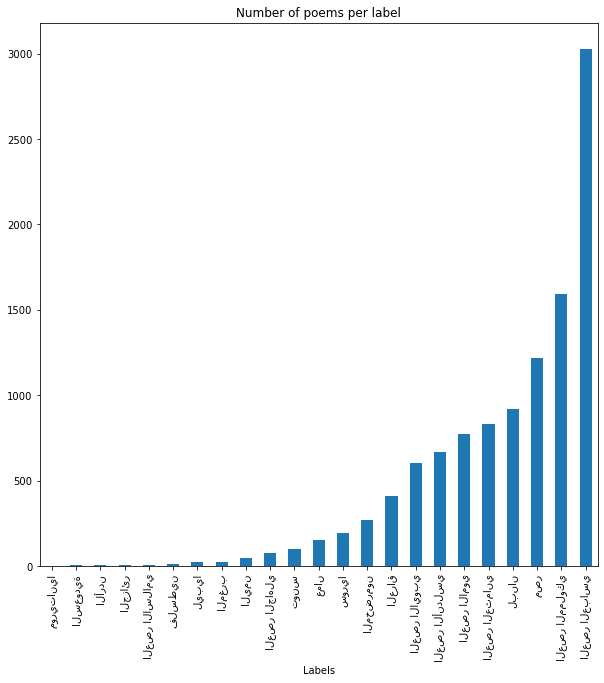

In [435]:
# Number of poems per label
poemsperCentury.sort_values().plot(kind='bar',figsize=(10,10))
plt.title(('Number of poems per label'))
plt.xlabel("Labels");

### Tokenization

In [473]:
nltk.download("stopwords")
arabic_stopwords = set(nltk.corpus.stopwords.words("arabic"))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/muneraalrajhi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [474]:
# Expande Arabic StopWords
data = []
with open('/Users/muneraalrajhi/Desktop/datasets/data/arabic_stop_words.txt','r') as myfile:
    for line in myfile:
        data.extend(map(str, line.rstrip('\n').split(',')))
print(data)
arabic_stopwords.update(data)

['،', 'ء', 'ءَ', 'آ', 'آب', 'آذار', 'آض', 'آل', 'آمينَ', 'آناء', 'آنفا', 'آه', 'آهاً', 'آهٍ', 'آهِ', 'أ', 'أبدا', 'أبريل', 'أبو', 'أبٌ', 'أجل', 'أجمع', 'أحد', 'أخبر', 'أخذ', 'أخو', 'أخٌ', 'أربع', 'أربعاء', 'أربعة', 'أربعمئة', 'أربعمائة', 'أرى', 'أسكن', 'أصبح', 'أصلا', 'أضحى', 'أطعم', 'أعطى', 'أعلم', 'أغسطس', 'أفريل', 'أفعل به', 'أفٍّ', 'أقبل', 'أكتوبر', 'أل', 'ألا', 'ألف', 'ألفى', 'أم', 'أما', 'أمام', 'أمامك', 'أمامكَ', 'أمد', 'أمس', 'أمسى', 'أمّا', 'أن', 'أنا', 'أنبأ', 'أنت', 'أنتم', 'أنتما', 'أنتن', 'أنتِ', 'أنشأ', 'أنه', 'أنًّ', 'أنّى', 'أهلا', 'أو', 'أوت', 'أوشك', 'أول', 'أولئك', 'أولاء', 'أولالك', 'أوّهْ', 'أى', 'أي', 'أيا', 'أيار', 'أيضا', 'أيلول', 'أين', 'أيّ', 'أيّان', 'أُفٍّ', 'ؤ', 'إحدى', 'إذ', 'إذا', 'إذاً', 'إذما', 'إذن', 'إزاء', 'إلى', 'إلي', 'إليكم', 'إليكما', 'إليكنّ', 'إليكَ', 'إلَيْكَ', 'إلّا', 'إمّا', 'إن', 'إنَّ', 'إى', 'إياك', 'إياكم', 'إياكما', 'إياكن', 'إيانا', 'إياه', 'إياها', 'إياهم', 'إياهما', 'إياهن', 'إياي', 'إيهٍ', 'ئ', 'ا', 'ا?', 'ا?ى', 'االا', 'االتى', 'اب

In [475]:
len(arabic_stopwords)

873

In [476]:
df['Poem'].dropna(inplace=True)
df['Poem_token'] = df['Poem'].apply(word_tokenize)

In [477]:
df['Poem_token']

0        [اصابت, سهام, الحتف, يا, حسره, الدهرصريح, قريش...
1        [جئت, يا, دهر, بالرزيه, بكراغادرت, مهجه, الهدي...
2        [وشادن, اورثني, حبهكالائتلافيين, حزنا, طويلعز,...
3        [قد, كانت, الامال, معقودهفيك, وللامال, تضليلوا...
4        [سواي, علي, الضيم, يبقي, رهيناوغيري, يري, ضارع...
                               ...                        
11186    [الي, وعدها, اصبو, وهل, ينجز, الوعد, وما, سئمت...
11187    [انت, يا, شغل, خاطري, نصب, عيني, حيثما, شئت, ا...
11188    [مهلا, امامه, كم, تطول, نواك, والقلب, قد, هجر,...
11189    [ابين, واشتياق, وارتياع, لقد, حملت, ما, لا, يس...
11190    [لله, عهد, للرصافه, سالف, يصف, الشبيبه, وهي, ف...
Name: Poem_token, Length: 10990, dtype: object

In [478]:
from nltk.stem.isri import ISRIStemmer
st = ISRIStemmer()

df['Poem_stem'] = df['Poem_token'].apply(lambda x: [st.stem(y) for y in x])

In [479]:
# Remove stop words
df['filtered_poems']= df['Poem_stem'].apply(lambda x: [item for item in x if item not in arabic_stopwords])

In [480]:
df.head()

,Poem,Number of Versus,Poet,Century,Label,Type,Metre,Poem_token,Poem_stem,filtered_poems,Detokenize
0,اصابت سهام الحتف يا حسره الدهرصريح قريش والخلا...,46,أبو المحاسن الكربلائي,العراق,عتاب,عموديه,بحر الطويل,"[اصابت, سهام, الحتف, يا, حسره, الدهرصريح, قريش...","[صبت, سهم, حتف, يا, حسر, دهرصريح, قرش, خلص, من...","[صبت, سهم, حتف, حسر, دهرصريح, خلص, هرلقد, نثل,...",صبت سهم حتف حسر دهرصريح خلص هرلقد نثل دهر كنن ...
1,جئت يا دهر بالرزيه بكراغادرت مهجه الهدي وهي حر...,37,أبو المحاسن الكربلائي,العراق,عتاب,عموديه,بحر الخفيف,"[جئت, يا, دهر, بالرزيه, بكراغادرت, مهجه, الهدي...","[جئت, يا, دهر, رزه, بكراغادرت, هجه, هدي, وهي, ...","[جئت, دهر, رزه, بكراغادرت, هجه, هدي, حري, قصد,...",جئت دهر رزه بكراغادرت هجه هدي حري قصد سهم نفسا...
2,وشادن اورثني حبهكالائتلافيين حزنا طويلعز علي ا...,14,أبو المحاسن الكربلائي,العراق,عتاب,عموديه,بحر السريع,"[وشادن, اورثني, حبهكالائتلافيين, حزنا, طويلعز,...","[وشد, ورث, حبهكالائتلافي, حزن, طويلعز, علي, وص...","[وشد, ورث, حبهكالائتلافي, حزن, طويلعز, وصل, كم...",وشد ورث حبهكالائتلافي حزن طويلعز وصل كمعز دردن...
3,قد كانت الامال معقودهفيك وللامال تضليلواليوم ل...,11,أبو المحاسن الكربلائي,العراق,عتاب,عموديه,بحر السريع,"[قد, كانت, الامال, معقودهفيك, وللامال, تضليلوا...","[قد, كانت, امل, معقودهفيك, امل, تضليلواليوم, ل...","[امل, معقودهفيك, امل, تضليلواليوم, رجء, هاسلو,...",امل معقودهفيك امل تضليلواليوم رجء هاسلو تنويلا...
4,سواي علي الضيم يبقي رهيناوغيري يري ضارعا مستكي...,87,أبو المحاسن الكربلائي,العراق,عتاب,عموديه,بحر المتقارب,"[سواي, علي, الضيم, يبقي, رهيناوغيري, يري, ضارع...","[سوي, علي, ضيم, يبق, رهيناوغيري, يري, ضرع, مست...","[سوي, ضيم, يبق, رهيناوغيري, يري, ضرع, مستكيناو...",سوي ضيم يبق رهيناوغيري يري ضرع مستكيناو جنب عز...


#### Most common words 

In [481]:
from nltk.tokenize.treebank import TreebankWordDetokenizer as Detok
df['Detokenize'] = df["filtered_poems"].apply(detokenizer.detokenize)

In [482]:
from collections import Counter
#top 10 words after stemming 
Top_words = Counter(" ".join(df["Detokenize"]).split()).most_common(50)
words = [t for t,n in Top_words]
frequency = [n for t,n in Top_words]
Top_words_df = pd.DataFrame({'words': words,'frequency': frequency})
Top_words_df.sort_values(by=["frequency"])

,words,frequency
49,وري,1619
48,قدر,1638
47,شوق,1648
46,سمع,1661
45,ظلم,1680
44,جمل,1693
43,ولي,1697
42,بحر,1724
41,ايم,1729
40,عرض,1736


In [483]:
# finding the most commen 30 woords
Top_words = {}
for comedian in df.Poem:
    a = df['Detokenize'].sort_values(ascending=False).head(30)
    Top_words['Detokenize']= list(zip(a.index, a.values))

Top_words

{'Detokenize': [(338, 'يول عزل يتم يتم'),
  (4355,
   'يوف روه ترن جمل شعراء موس جلس ونت بدء صلح دنا بقت مكر ذكر سلم فجر ادح جدد ذكر انع خلق صان عرب اعج ختر وبن وكل ملك ؤيد حمي الق سلح جيش غلب اقم يحص مغن حق هرج امن عدي يبت منع جلو بشر ملا قطب وتج لبك ملك لوك دعو شفت سمع ورق توس يعط ختر نبي ثوب اعظ حر شوق اري مصل مسل بقع ثرب صبح ساؤ حطم زمز يعل ضجج حجج شكر تول سعد لئك سما حبذ وفد شام مقد وفد حضر حجز مقو كنت شهد جلي اضح فؤد محو تطرب حفف روح شوق ثري تنس اهد نضر عيش كنت جاز مخي حتي نشر بخر لءه افق ئتم حمم قشع وكس نبت قفر خمل غنء صطحب غزل ضيغ جهر نجي شعر لبس ثوب فتح معل هدك سير ولي حمك نهي نمي قسم يسل سبل وضح سهل يسل سبل مبه يضم جمع لوء وحد تقم وحد يهم تحك وذا لكت قلب رقب ملك طيع مرغ ادب عاص طال سجن عفو كرم وعل حزم غلب قهر وري يول رفق ضعف مجر عثم سلم دمت حيا مته زال روح فؤد حبكم حتي مجس بلق سبب سلك ظبي اسه شهد جيش ظفر ضرب عقب جيش شرد محج هلل طلع يمن جلو ميد نقع مظل'),
  (8070,
   'يهي سوك تهو فهل سفه اشد راي ضلل حزم سيف نزل بحد شك غلل نزه هوك خلص خلص نزه راس كلل'),
  (6390,
   'يهي ذؤب خضر